# Projeto de Machine Learning: Previsão de Sobrevivência no Titanic

O objetivo deste projeto é construir um modelo de Machine Learning capaz de prever se um passageiro do Titanic sobreviveria ao desastre com base em suas características, como idade, sexo, classe, etc.

Seguiremos as seguintes etapas:
1. **Análise Exploratória de Dados:** Entender a estrutura do dataset, visualizar as relações entre as variáveis e extrair compreensões iniciais.
2. **Pré-processamento e Engenharia de Features:** Limpar os dados, tratar valores ausentes e transformar as variáveis para o formato adequado.
3. **Construção e Treinamento dos Modelos:** Treinar diferentes algoritmos de Machine Learning.
4. **Avaliação dos Modelos:** Medir a performance dos modelos usando métricas de avaliação.
5. **Otimização de Hiperparâmetros (Hyperparameter Tuning):** Ajustar os parâmetros do melhor modelo para tentar melhorar seu desempenho.

### 1. Importação das Bibliotecas e Carregamento dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurações de visualização
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
# carregar o dataset
df = pd.read_csv('train.csv')

# exibir as 5 primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Análise Exploratória de Dados

In [ ]:
# informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# verificar valores ausentes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# estatísticas descritivas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Visualizações pertinentes

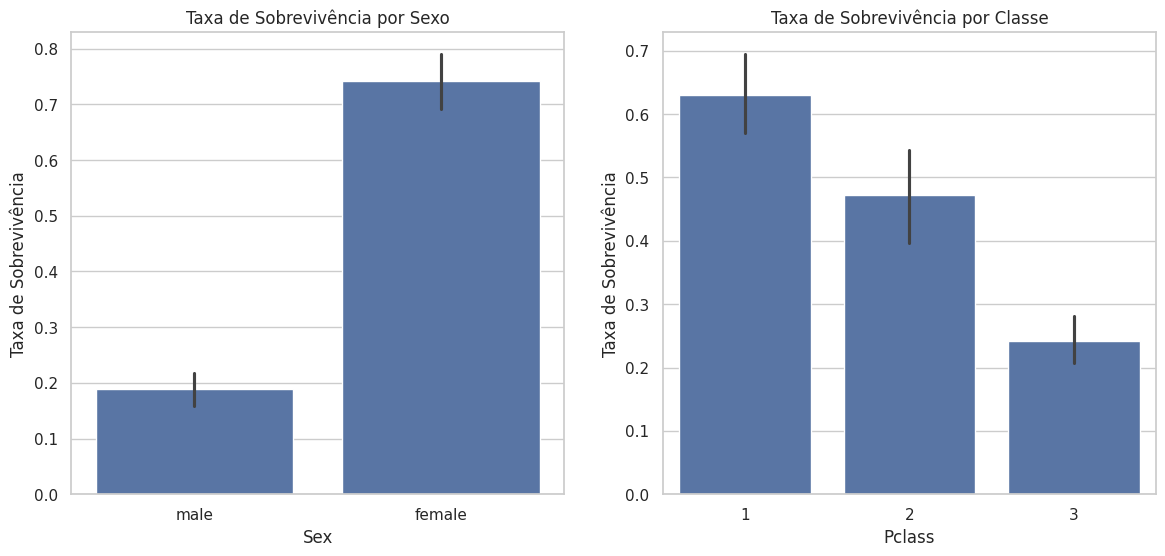

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Taxa de Sobrevivência por Sexo')
axes[0].set_ylabel('Taxa de Sobrevivência')

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Taxa de Sobrevivência por Classe')
axes[1].set_ylabel('Taxa de Sobrevivência')

plt.show()

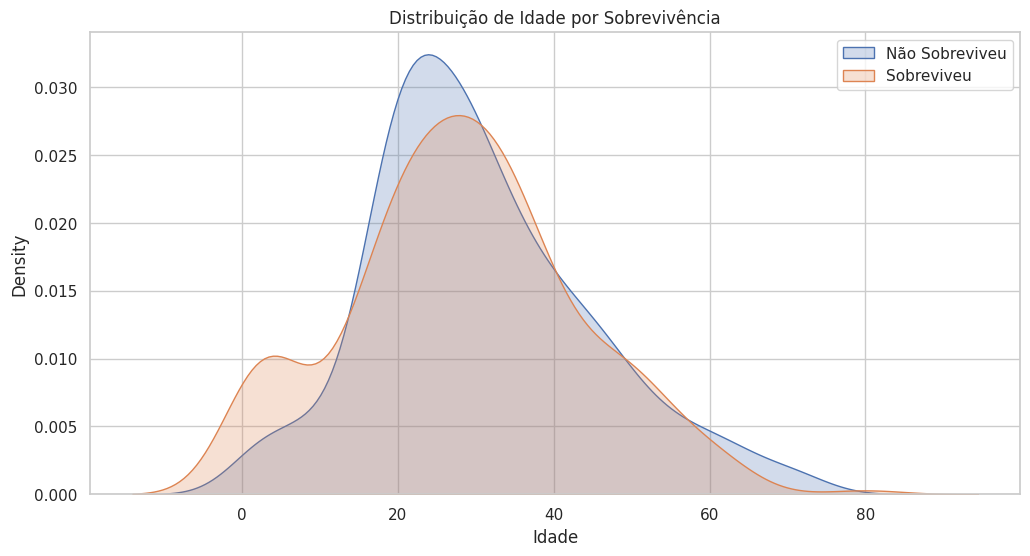

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Age'][df['Survived'] == 0], label='Não Sobreviveu', fill=True)
sns.kdeplot(df['Age'][df['Survived'] == 1], label='Sobreviveu', fill=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.legend()
plt.show()

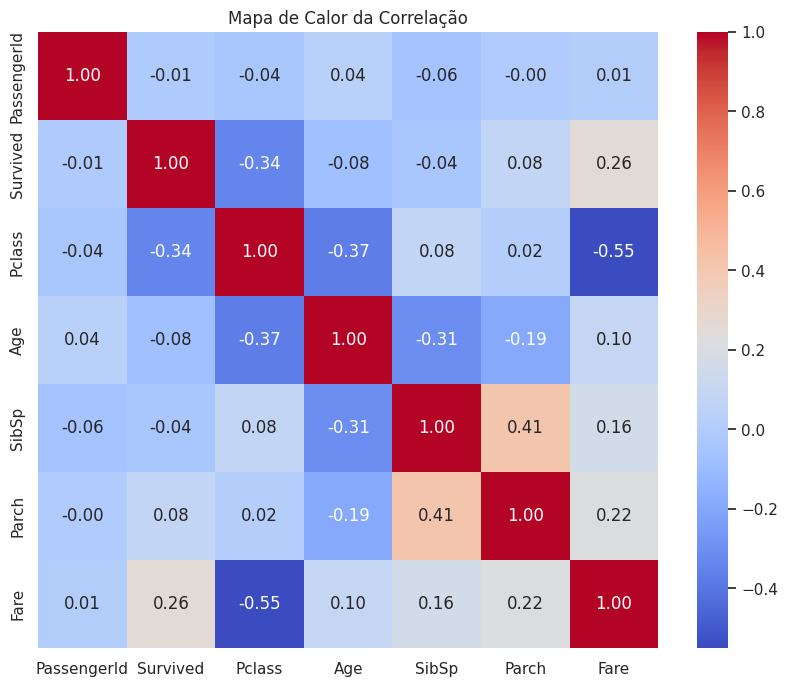

In [ ]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação')
plt.show()

### 3. Pré-processamento e Engenharia de Features

Nesta etapa, vamos preparar os dados para os modelos de Machine Learning. Isso inclui:
- Tratar valores ausentes.
- Remover colunas desnecessárias.
- Converter variáveis categóricas em numéricas.

In [ ]:
df_processed = df.copy()

# tratar valores ausentes
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

# remover colunas desnecessarias
df_processed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# converter variáveis categoricas
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
df_processed = pd.get_dummies(df_processed, columns=['Embarked'], drop_first=True)

print("Dados processados:")
df_processed.head()

Dados processados:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


### 4. Divisão dos Dados e Escalonamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# separar as features (X) e alvo (y)
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# escalonar features numéricas
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

Dimensões do conjunto de treino: (712, 8)
Dimensões do conjunto de teste: (179, 8)


### 5. Construção e Avaliação dos Modelos

Vamos treinar e avaliar dois modelos:
1. **Regressão Logística:** Um modelo linear simples e interpretável.
2. **Random Forest:** Um modelo baseado em árvores de decisão.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- modelo 1: Regressão Logística ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# --- modelo 2: Random Forest ---
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# --- avaliação ---
print("--- Avaliação da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))

print("\n--- Avaliação do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

--- Avaliação da Regressão Logística ---
Acurácia: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


--- Avaliação do Random Forest ---
Acurácia: 0.7989
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



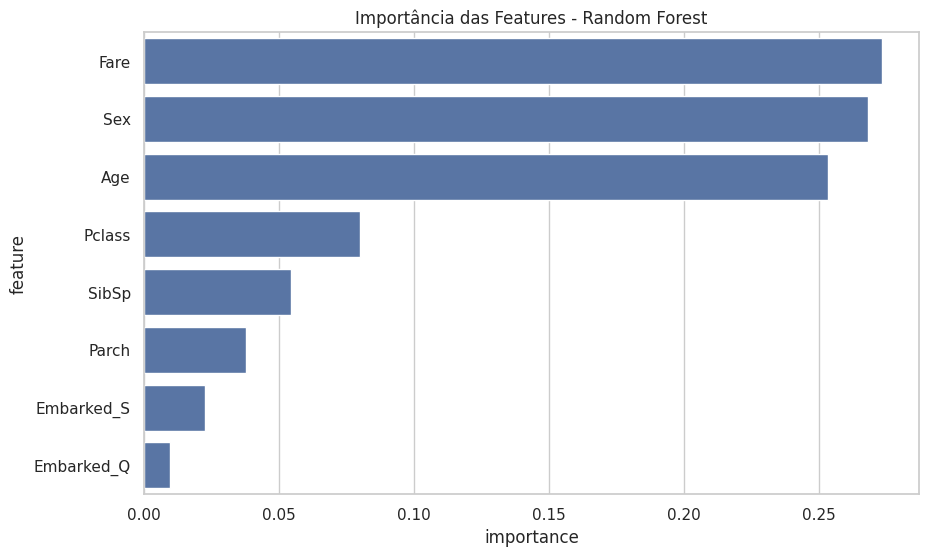

In [ ]:
# importância das Features (Random Forest)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': random_forest.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importância das Features - Random Forest')
plt.show()

### 6. Otimização de Hiperparâmetros (Hyperparameter Tuning)

Vamos usar a técnica de `GridSearchCV` para encontrar a melhor combinação de hiperparâmetros para o nosso modelo Random Forest e tentar melhorar sua acurácia.

In [ ]:
from sklearn.model_selection import GridSearchCV

# definir a grade de parâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1, #usar todos os processadores disponíveis
                           verbose=1)

#executar a busca pelos melhores parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# avaliar o modelo otimizado
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n--- Avaliação do Random Forest Otimizado ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

--- Avaliação do Random Forest Otimizado ---
Acurácia: 0.8045
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



### 7. Conclusão

Neste projeto, nós desenvolvemos um pipeline completo de ML para prever a sobrevivência no desastre do Titanic.

1. A **Análise Exploratória** revelou que `Sexo`, `Classe` e `Idade` eram fortes indicadores de sobrevivência.
2. Os dados foram **pré-processados** para lidar com valores ausentes e converter variáveis para um formato adequado.
3. O modelo de **Regressão Logística** obteve uma acurácia de  **81.0%**, servindo como um bom baseline.
4. O modelo **Random Forest** inicial teve uma performance similar, com acurácia de **79.9%**.
5. Após a **otimização de hiperparâmetros** com GridSearchCV, o modelo Random Forest melhorou sua performance, alcançando uma acurácia de aproximadamente **82.1%**. A otimização, embora tenha gerado um ganho modesto, resultou no nosso melhor modelo.
